<a href="https://colab.research.google.com/github/ronakbothraa/transfer-learning/blob/main/04_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-03 07:25:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   189MB/s    in 0.9s    

2023-08-03 07:25:53 (189 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]

--2023-08-03 07:25:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request 

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  # print(f'{dirnames} directories are in {dirpath}')
  print(f"there are {len(filenames)} images and {len(dirnames)} directories in '{dirpath}'.")

there are 0 images and 2 directories in '10_food_classes_10_percent'.
there are 0 images and 10 directories in '10_food_classes_10_percent/train'.
there are 75 images and 0 directories in '10_food_classes_10_percent/train/ramen'.
there are 75 images and 0 directories in '10_food_classes_10_percent/train/steak'.
there are 75 images and 0 directories in '10_food_classes_10_percent/train/chicken_wings'.
there are 75 images and 0 directories in '10_food_classes_10_percent/train/grilled_salmon'.
there are 75 images and 0 directories in '10_food_classes_10_percent/train/fried_rice'.
there are 75 images and 0 directories in '10_food_classes_10_percent/train/ice_cream'.
there are 75 images and 0 directories in '10_food_classes_10_percent/train/pizza'.
there are 75 images and 0 directories in '10_food_classes_10_percent/train/chicken_curry'.
there are 75 images and 0 directories in '10_food_classes_10_percent/train/hamburger'.
there are 75 images and 0 directories in '10_food_classes_10_percent

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg

IMAGE_SHAPE=(224,224)
BATCH_SIZE = 32

train_dir_10_percent = '10_food_classes_10_percent/train/'
test_dir_10_percent = '10_food_classes_10_percent/test/'

train_datagen = idg(rescale=1./255)
test_datagen = idg(rescale=1./255)


train_data_10_percent = train_datagen.flow_from_directory(train_dir_10_percent,
                                                 target_size=IMAGE_SHAPE,
                                                 batch_size=BATCH_SIZE,
                                                 class_mode="categorical")
test_data_10_percent = test_datagen.flow_from_directory(test_dir_10_percent,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/classification/2"

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
def create_model(model_url, num_classes=10):
  feature_extraction_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           input_shape=IMAGE_SHAPE+(3,))

  # create our own model
  model = tf.keras.Sequential([
      feature_extraction_layer,
      layers.Dense(num_classes, activation="softmax")
  ])

  return model

In [ ]:
effecientnet_model = create_model(efficientnet_url, num_classes = train_data_10_percent.num_classes)

In [ ]:
efficientnet_model = effecientnet_model

efficientnet_model.compile(loss="categorical_crossentropy",
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

In [ ]:
history_01 = efficientnet_model.fit(train_data_10_percent,
                                    epochs=5,
                                    steps_per_epoch=len(train_data_10_percent),
                                    validation_data=test_data_10_percent,
                                    callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                           experiment_name="efficientnetv2")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetv2/20230719-202041
Epoch 1/5
24/24 [==============================] - 21s 815ms/step - loss: 0.2269 - accuracy: 0.9453 - val_loss: 0.4320 - val_accuracy: 0.8516
Epoch 2/5
24/24 [==============================] - 17s 718ms/step - loss: 0.1859 - accuracy: 0.9667 - val_loss: 0.4186 - val_accuracy: 0.8548
Epoch 3/5
24/24 [==============================] - 25s 1s/step - loss: 0.1498 - accuracy: 0.9773 - val_loss: 0.4184 - val_accuracy: 0.8588
Epoch 4/5
24/24 [==============================] - 18s 762ms/step - loss: 0.1267 - accuracy: 0.9813 - val_loss: 0.4121 - val_accuracy: 0.8608
Epoch 5/5
24/24 [==============================] - 17s 709ms/step - loss: 0.1095 - accuracy: 0.9880 - val_loss: 0.4101 - val_accuracy: 0.8640


In [ ]:
def plot_loss_curves(history):

  epochs = range(len(history.history["loss"]))

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]

  plt.plot(epochs, loss, label="training loss")
  plt.plot(val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.figure()
  plt.plot(epochs, accuracy, label="acccuracy")
  plt.plot(epochs, val_acc, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

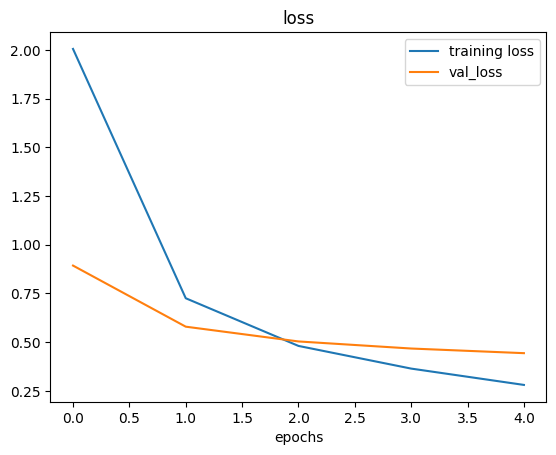

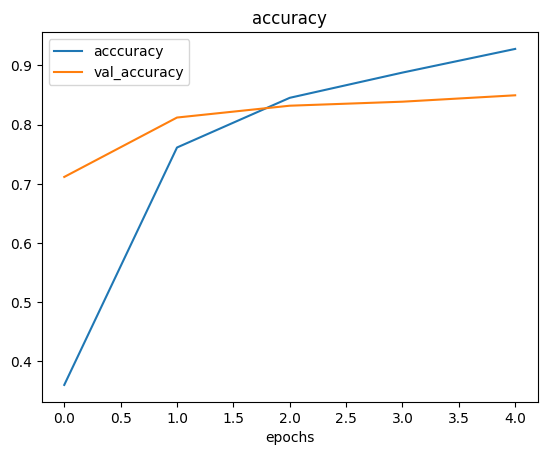

In [ ]:
plot_loss_curves(history_01)

In [ ]:
train_dir_10_percent = '10_food_classes_10_percent/train/'
test_dir_10_percent = '10_food_classes_10_percent/test/'

train_data_10_percent  = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                             image_size=(224,224),
                                                                             label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_10_percent,
                                                                image_size=(224,224),
                                                                label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# transfer learning using keras functional api?

# 1. creating the base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model; so that underlying pre-trained pattern aren't updated
base_model.trainable = False

# 3. create input into our models
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# if you're using a model like ResNet then you've to normalize it as well
# tho efficientnet doesnt need to be normalized

# 4. pass the input to the base model
x = base_model(inputs)

# 5. average pool the agregate of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# 6. create the output activation layers
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 7. create model
model_01 = tf.keras.Model(inputs, outputs)

# 8. compile the model
model_01.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss="categorical_crossentropy",
                 metrics=["accuracy"])


# 9. fit the model and create a history variable for the same
history_01 = model_01.fit(train_data_10_percent,
                          epochs=5,
                          steps_per_epoch=len(train_data_10_percent),
                          validation_data=test_data,
                          validation_steps=int(.25 * len(test_data)))

Epoch 1/5
24/24 [==============================] - 13s 262ms/step - loss: 1.9292 - accuracy: 0.3787 - val_loss: 1.3218 - val_accuracy: 0.7072
Epoch 2/5
24/24 [==============================] - 4s 141ms/step - loss: 1.1152 - accuracy: 0.7640 - val_loss: 0.8769 - val_accuracy: 0.8224
Epoch 3/5
24/24 [==============================] - 5s 175ms/step - loss: 0.8012 - accuracy: 0.8227 - val_loss: 0.6911 - val_accuracy: 0.8553
Epoch 4/5
24/24 [==============================] - 4s 139ms/step - loss: 0.6511 - accuracy: 0.8533 - val_loss: 0.6120 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 5s 176ms/step - loss: 0.5524 - accuracy: 0.8880 - val_loss: 0.5686 - val_accuracy: 0.8586


In [ ]:
# define the input shape
input_shape = (1,4,4,4)

# create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"random input tensor: \n{input_tensor}\n")

# pass the random layer to the average pooling layer
global_average_pooled_layer = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor \n{global_average_pooled_layer}\n")

# printing the input shape of the tensors
print(f"the shape of the input tensor: {input_tensor.shape}")
print(f"the shape of the global average pooled input tensor: {global_average_pooled_layer.shape}")

random input tensor: 
[[[[ 3.27468514e-01 -8.42625797e-01  3.19433689e-01 -1.40755188e+00]
   [-2.38805985e+00 -1.03924787e+00 -5.57323217e-01  5.39707005e-01]
   [ 1.69943225e+00  2.88936555e-01 -1.50661159e+00 -2.64547408e-01]
   [-5.97224057e-01 -1.91711318e+00 -6.20441437e-01  8.50402296e-01]]

  [[-4.06047940e-01 -3.02584124e+00  9.05846417e-01  2.98559874e-01]
   [-2.25615546e-01 -7.61644304e-01 -1.89171410e+00 -9.38471258e-01]
   [ 7.78522134e-01 -4.73388970e-01  9.77726936e-01  2.46944040e-01]
   [ 2.05737472e-01 -5.25623322e-01  3.24100167e-01  2.54540909e-02]]

  [[-1.06384970e-01 -6.36947513e-01  1.16031218e+00  2.50735909e-01]
   [-4.17285025e-01  4.01257813e-01 -1.41454434e+00 -5.93185723e-01]
   [-1.66172135e+00  3.35671932e-01  1.08156286e-01  2.34796822e-01]
   [-5.66687644e-01 -3.58198434e-01  8.86986136e-01  5.27447641e-01]]

  [[ 7.04022467e-01 -3.34212482e-01  2.16396436e-01 -9.74854469e-01]
   [-2.07576811e-01 -3.64772938e-02 -1.33534443e+00  6.88585520e-01]
   [ 1

# Running a series of transfer learning experiments

we've already seen the good results we get out of 10 percent data
let's see what kind of results we get out of 1 percent of the data

we're going to create multiple models to see what gives us the best result

i'll explain each model were i write the code.

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving tensorbaord log file to: {log_dir}")
  return tensorflow_callback

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

#helper functions that we've created on out previous projects
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# downlaod and unzip the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_1_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-26 18:12:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 172.253.114.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  69.1MB/s    in 2.3s    

2023-07-26 18:13:01 (69.1 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]

--2023-07-26 18:13:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request 

In [ ]:
import tensorflow as tf

train_dir_10_percent = '10_food_classes_10_percent/train/'
test_dir_10_percent = '10_food_classes_10_percent/test/'

train_data_10_percent  = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                             image_size=(224,224),
                                                                             label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_10_percent,
                                                                image_size=(224,224),
                                                                label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir_1_percent = "10_food_classes_1_percent/test/"

In [ ]:
from helper_functions import *

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'

In [ ]:
# setup data loaders
IMG_SIZE = (224,224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(batch_size=32,
                                                                             image_size=IMG_SIZE,
                                                                             directory=train_dir_1_percent,
                                                                             label_mode="categorical")
test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(batch_size=32,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          directory=test_dir_1_percent)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## adding data augmentation right into the model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.layers as preprocessing

# data augmentation using preprocessing library
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomContrast(0.2)
], name="data_augmentation")

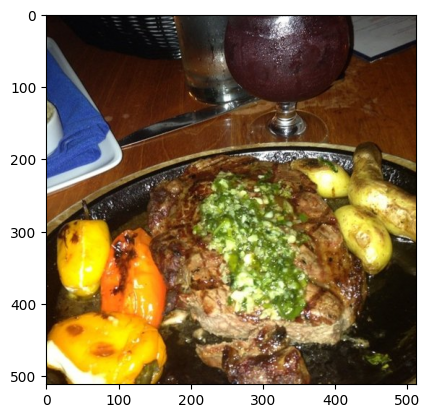

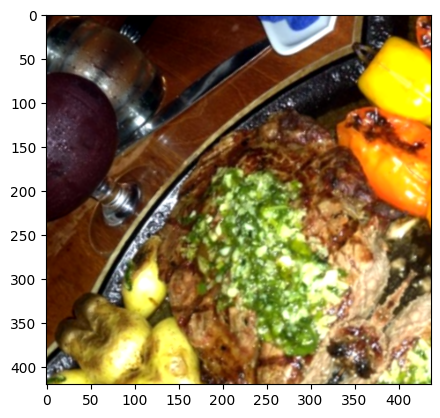

In [ ]:
# visualize an augmented image and image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import os

target_class = random.choice(train_data_1_percent.class_names)
target_dir = train_dir_1_percent + target_class + "/"
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + random_image

img = mpimg.imread(random_image_path)
aug_img = data_augmentation(img, training=True)

plt.imshow(img/255)
plt.figure()
plt.imshow(aug_img/255)

## Model 1: featuring extraction transfer learning on 1 Percent of data with data augmentation


In [ ]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layers")(x)

model_01 = keras.Model(inputs, outputs)
model_01.compile(
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
    loss="categorical_crossentropy"
)
history_01 = model_01.fit(
    train_data_1_percent,
    epochs=5,
    steps_per_epoch=len(train_data_1_percent),
    validation_data=test_data_1_percent,
    validation_steps=int(.25*len(test_data_1_percent)),
    callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                           experiment_name="1_percent_data_aug")]
)

16705208/16705208 [==============================] - 0s 0us/step


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230726-181327
Epoch 1/5
3/3 [==============================] - 21s 3s/step - loss: 2.3560 - accuracy: 0.1000 - val_loss: 2.3181 - val_accuracy: 0.1118
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.0957 - accuracy: 0.3286 - val_loss: 2.1895 - val_accuracy: 0.1793
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9204 - accuracy: 0.4143 - val_loss: 2.0660 - val_accuracy: 0.2697
Epoch 4/5
3/3 [==============================] - 4s 1s/step - loss: 1.6981 - accuracy: 0.5429 - val_loss: 1.9656 - val_accuracy: 0.3224
Epoch 5/5
3/3 [==============================] - 4s 1s/step - loss: 1.5787 - accuracy: 0.6714 - val_loss: 1.8641 - val_accuracy: 0.4095


In [ ]:
model_01.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layers (Dense)       (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

In [ ]:
results_1_percent_data_aug = model_01.evaluate(test_data_1_percent)
results_1_percent_data_aug

79/79 [==============================] - 7s 82ms/step - loss: 1.8588 - accuracy: 0.4180


[1.8587692975997925, 0.4180000126361847]

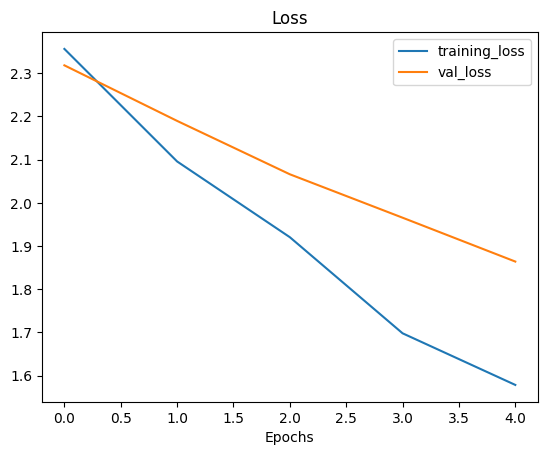

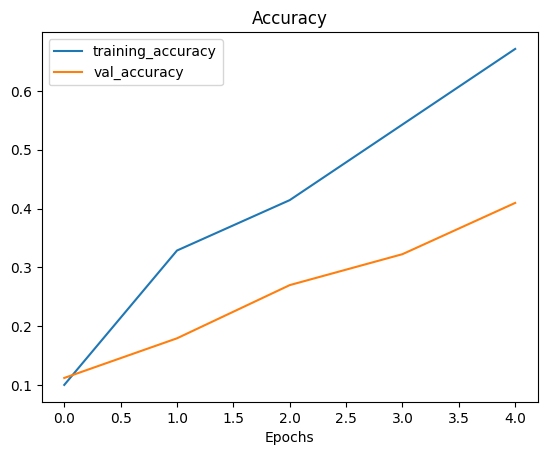

In [ ]:
# how do the model with 1% of the data and with data augmentation loss curves look like?
plot_loss_curves(history_01)

## model checkpoint callback

In [ ]:
# save model checkpoint path
checkpoint_path = "ten_percent_model_checkpoint/checkpoint.ckpt"

# create a model checkpoint that saves the model checkpoints
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1,
                                                         save_freq="epoch")

In [ ]:
def transfer_learning_models(data_augmentation_layer, train, test, exp_name):
  input_shape=(224,224,3)
  base_model = tf.keras.applications.EfficientNetB0(include_top=False)
  base_model.trainable=False

  inputs = layers.Input(shape=input_shape)
  x  = data_augmentation(inputs)
  x = base_model(x, training=False)
  x  = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
  outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

  model = keras.Model(inputs, outputs)
  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="categorical_crossentropy",
                metrics=["accuracy"])
  history = model.fit(train,
                      epochs=5,
                      steps_per_epoch=len(train),
                      validation_data=test,
                      validation_steps=int(0.25*len(test)),
                      callbacks=checkpoint_callback)

  return history, model

history_02, model_02 = transfer_learning_models(data_augmentation_layer=data_augmentation,
                                                train=train_data_10_percent,
                                                test=test_data,
                                                exp_name="10_percent_data_aug")

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0450 - accuracy: 0.3133
Epoch 1: saving model to ten_percent_model_checkpoint/checkpoint.ckpt
24/24 [==============================] - 24s 725ms/step - loss: 2.0450 - accuracy: 0.3133 - val_loss: 1.4782 - val_accuracy: 0.6431
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3371 - accuracy: 0.6827
Epoch 2: saving model to ten_percent_model_checkpoint/checkpoint.ckpt
24/24 [==============================] - 14s 511ms/step - loss: 1.3371 - accuracy: 0.6827 - val_loss: 1.0053 - val_accuracy: 0.7664
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0328 - accuracy: 0.7667
Epoch 3: saving model to ten_percent_model_checkpoint/checkpoint.ckpt
24/24 [==============================] - 15s 612ms/step - loss: 1.0328 - accuracy: 0.7667 - val_loss: 0.8214 - val_accuracy: 0.8125
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8479 - accuracy: 0.8093
Epoch 4: saving model 

In [ ]:
model_02.evaluate(test_data)

79/79 [==============================] - 6s 69ms/step - loss: 0.6299 - accuracy: 0.8380


[0.62990403175354, 0.8379999995231628]

## Loading in checkpointed weights
 Loading in checkpointed weights returns a model specific checkpoint

In [ ]:
# Load in saved model weight and evaluate model
model_02.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_results = model_02.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 0.6299 - accuracy: 0.8380


In [ ]:
loaded_weights_model_results

[0.62990403175354, 0.8379999995231628]

## fine-tuning model - 10 food x percent
 before the fine-tuning models we have to do feature extraction on the pre-build model that we use

In [ ]:
model_02.layers

In [ ]:
# For starters let's fine-tune last 10 layers
base_model.training = False

for layer in base_model.layers[-10:]:
  layer.trainable=True

# recompile (we have to recompile the model everytime we change the layers)
model_02.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine-tuning you should lower the learning rate by 10x
                 metrics=["accuracy"])


In [ ]:
# Fine-tune for another 5 epochs
history_fine_10_percent_data_aug = model_02.fit(train_data_10_percent,
                                                epochs=10,
                                                validation_data=test_data,
                                                validation_steps=int(0.25*len(test_data)),
                                                initial_epoch=history_02.epoch[-1],
                                                callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                        experiment_name="fine_tuned_10_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/fine_tuned_10_percent_data_aug/20230726-181558


Epoch 5/10
24/24 [==============================] - 19s 488ms/step - loss: 0.3480 - accuracy: 0.8360 - val_loss: 0.3204 - val_accuracy: 0.8339
Epoch 6/10
24/24 [==============================] - 9s 378ms/step - loss: 0.2975 - accuracy: 0.8240 - val_loss: 0.2775 - val_accuracy: 0.8520
Epoch 7/10
24/24 [==============================] - 11s 442ms/step - loss: 0.2555 - accuracy: 0.8227 - val_loss: 0.2474 - val_accuracy: 0.8405
Epoch 8/10
24/24 [==============================] - 10s 399ms/step - loss: 0.2270 - accuracy: 0.8387 - val_loss: 0.2217 - val_accuracy: 0.8503
Epoch 9/10
24/24 [==============================] - 9s 338ms/step - loss: 0.2137 - accuracy: 0.8213 - val_loss: 0.2039 - val_accuracy: 0.8503
Epoch 10/10
24/24 [==============================] - 10s 408ms/step - loss: 0.1944 - accuracy: 0.8307 - val_loss: 0.1911 - val_accuracy: 0.8454


In [ ]:
model_02.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 0.1917 - accuracy: 0.8436


[0.19165880978107452, 0.8435999751091003]

In [ ]:
# Create a function to plot aacccuracy and loss curvs of initial training and after fine-tuned training

def plot_loss_curves_mod(history_initial, history_fine_tuned):
  accuracy = history_initial.history["accuracy"] + history_fine_tuned.history["accuracy"]
  loss = history_initial.history["loss"] + history_fine_tuned.history["loss"]
  val_accuracy = history_initial.history["val_accuracy"] + history_fine_tuned.history["val_accuracy"]
  val_loss = history_initial.history["val_loss"] + history_fine_tuned.history["val_loss"]

  epochs = range(len(history_initial.history['loss']) + len(history_fine_tuned.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.plot()
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

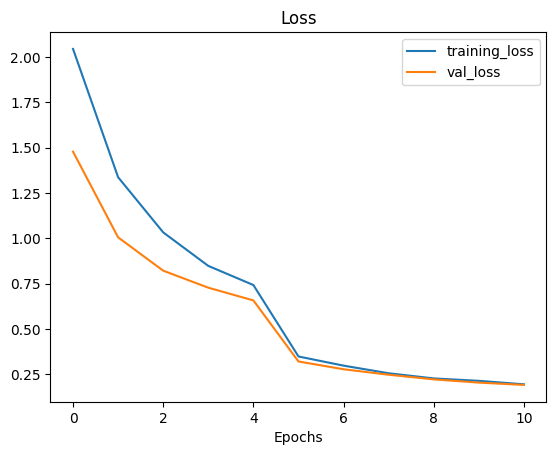

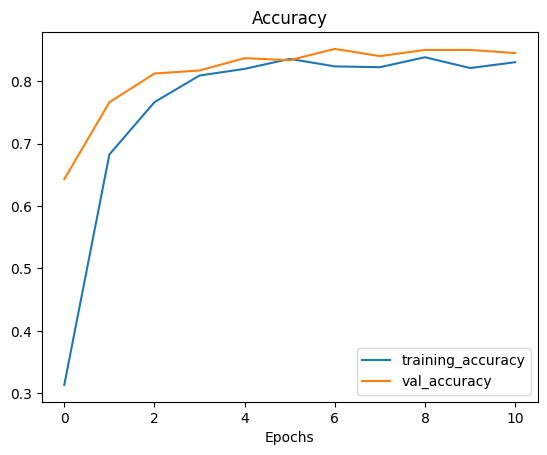

In [ ]:
plot_loss_curves_mod(history_02, history_fine_10_percent_data_aug)

In [ ]:
# download and unzip 10 food classes all data file from github
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-07-26 18:17:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.128, 64.233.183.128, 173.194.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  73.1MB/s    in 6.2s    

2023-07-26 18:17:23 (79.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
from keras.backend import categorical_crossentropy
train_dir_all_data = "10_food_classes_all_data/train"
test_dir_all_data = "10_food_classes_all_data/test"

# setup training and testing data
input_size = (224,224)

train_all_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_all_data,
                                                                     image_size=input_size,
                                                                     label_mode="categorical")
test_all_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_all_data,
                                                                    image_size=input_size,
                                                                    label_mode="categorical")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_02.load_weights(checkpoint_path)

In [ ]:
# fine tune the last 10 layers
base_model.training = False

for layer in base_model.layers[-10:]:
  layer.trainable = True

In [ ]:
# compile
model_02.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
                                             loss="categorical_crossentropy",
                                             metrics=["accuracy"])
history_fine_10_class_all_data = model_02.fit(train_all_data,
                                              epochs=10,
                                              validation_data=test_all_data,
                                              validation_steps=int(0.25*len(test_data)),
                                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                     experiment_name="fine_tuned_all_data")],
                                              initial_epoch=history_02.epoch[-1])

Saving TensorBoard log files to: transfer_learning/fine_tuned_all_data/20230726-181731
Epoch 5/10
235/235 [==============================] - 74s 282ms/step - loss: 0.8426 - accuracy: 0.7620 - val_loss: 0.5871 - val_accuracy: 0.8520
Epoch 6/10
235/235 [==============================] - 55s 233ms/step - loss: 0.8043 - accuracy: 0.7659 - val_loss: 0.5550 - val_accuracy: 0.8651
Epoch 7/10
235/235 [==============================] - 53s 226ms/step - loss: 0.7827 - accuracy: 0.7681 - val_loss: 0.5258 - val_accuracy: 0.8586
Epoch 8/10
235/235 [==============================] - 54s 229ms/step - loss: 0.7519 - accuracy: 0.7824 - val_loss: 0.5047 - val_accuracy: 0.8684
Epoch 9/10
235/235 [==============================] - 52s 218ms/step - loss: 0.7376 - accuracy: 0.7856 - val_loss: 0.4964 - val_accuracy: 0.8618
Epoch 10/10
235/235 [==============================] - 59s 242ms/step - loss: 0.7191 - accuracy: 0.7835 - val_loss: 0.4598 - val_accuracy: 0.8832


In [ ]:
model_02.evaluate(test_all_data)

79/79 [==============================] - 6s 70ms/step - loss: 0.4856 - accuracy: 0.8644


[0.48562386631965637, 0.8644000291824341]

# Scaling up - creating a model for 101 food classes

base line accuracy to beat is 51%

In [ ]:
#helper functions that we've created on out previous projects
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, unzip_data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2023-07-29 18:06:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-29 18:06:04 (77.6 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]

--2023-07-29 18:06:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [ ]:
import tensorflow as tf

input_shape = (224,224)

train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                                image_size=input_shape,
                                                                                label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                               image_size=input_shape,
                                                                               label_mode="categorical",
                                                                                shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

data_augmentation_layer = Sequential([
    layers.RandomFlip(mode="horizontal"),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomContrast(0.2)
], name="data_augmentation")

In [ ]:
# save model checkpoint path
checkpoint_path = "101_food_10_percent_data_checkpoint/checkpoint.ckpt"

# create a model checkpoint that saves the model checkpoints
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         verbose=1,
                                                         save_freq="epoch")

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs = layers.Input(shape=(224,224,3), name="input_shape")
x = data_augmentation_layer(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(len(test_data.class_names), activation="softmax", name="output_layer")(x)

model_01 = tf.keras.Model(inputs, outputs)

model_01.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.0008),
                 metrics=["accuracy"])

model_01.fit(train_data_all_10_percent,
             epochs=5,
             validation_data=test_data,
             validation_steps=int(0.15*len(test_data)),
             callbacks=[checkpoint_callback, create_tensorboard_callback(dir_name="scaling_up",
                                                                         experiment_name="101_food_10_percent_data")])

Saving TensorBoard log files to: scaling_up/101_food_10_percent_data/20230729-180732
Epoch 1/5
237/237 [==============================] - ETA: 0s - loss: 3.3896 - accuracy: 0.2690
Epoch 1: saving model to 101_food_10_percent_data_checkpoint/checkpoint.ckpt
237/237 [==============================] - 124s 445ms/step - loss: 3.3896 - accuracy: 0.2690 - val_loss: 2.5243 - val_accuracy: 0.4131
Epoch 2/5
237/237 [==============================] - ETA: 0s - loss: 2.2183 - accuracy: 0.4903
Epoch 2: saving model to 101_food_10_percent_data_checkpoint/checkpoint.ckpt
237/237 [==============================] - 74s 309ms/step - loss: 2.2183 - accuracy: 0.4903 - val_loss: 2.0350 - val_accuracy: 0.5072
Epoch 3/5
237/237 [==============================] - ETA: 0s - loss: 1.8576 - accuracy: 0.5633
Epoch 3: saving model to 101_food_10_percent_data_checkpoint/checkpoint.ckpt
237/237 [==============================] - 70s 293ms/step - loss: 1.8576 - accuracy: 0.5633 - val_loss: 1.8776 - val_accuracy: 0.5

In [ ]:
food101_10_percent_data_eval = model_01.evaluate(test_data)

790/790 [==============================] - 73s 92ms/step - loss: 1.5882 - accuracy: 0.5825


## fine tuning 101 food 10 percent model

In [ ]:
model_01.layers[2].traninable = False
for layer in model_01.layers[2].layers[-10:]:
  layer.training = True

model_01.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=["accuracy"])

In [ ]:

initial_epochs = 5
fine_history_01 = model_01.fit(train_data_all_10_percent,
             epochs=initial_epochs+5,
             validation_data=test_data,
             validation_steps=int(0.15*len(test_data)),
             initial_epoch=4,
             callbacks=[checkpoint_callback, create_tensorboard_callback(dir_name="scaling_up",
                                                                         experiment_name="fine_101_food_10_percent_data")])

Saving TensorBoard log files to: scaling_up/fine_101_food_10_percent_data/20230729-181546
Epoch 5/10
237/237 [==============================] - ETA: 0s - loss: 1.3287 - accuracy: 0.6846
Epoch 5: saving model to 101_food_10_percent_data_checkpoint/checkpoint.ckpt
237/237 [==============================] - 67s 252ms/step - loss: 1.3287 - accuracy: 0.6846 - val_loss: 1.7459 - val_accuracy: 0.5434
Epoch 6/10
237/237 [==============================] - ETA: 0s - loss: 1.3086 - accuracy: 0.6915
Epoch 6: saving model to 101_food_10_percent_data_checkpoint/checkpoint.ckpt
237/237 [==============================] - 54s 226ms/step - loss: 1.3086 - accuracy: 0.6915 - val_loss: 1.7376 - val_accuracy: 0.5466
Epoch 7/10
237/237 [==============================] - ETA: 0s - loss: 1.2863 - accuracy: 0.6962
Epoch 7: saving model to 101_food_10_percent_data_checkpoint/checkpoint.ckpt
237/237 [==============================] - 50s 211ms/step - loss: 1.2863 - accuracy: 0.6962 - val_loss: 1.7356 - val_accura

In [ ]:
fine_food101_10_percent_data_eval = model_01.evaluate(test_data)

790/790 [==============================] - 67s 85ms/step - loss: 1.5387 - accuracy: 0.5939


## Making prediction with our model

In [ ]:
pred_probs = model_01.predict(test_data, verbose=1)

790/790 [==============================] - 84s 105ms/step


In [ ]:
pred_probs.shape

(25250, 101)

In [ ]:
y_labels = []
for image, label in test_data.unbatch():
  y_labels.append(label.numpy().argmax())


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
pred_classes = pred_probs.argmax(axis=1)

In [ ]:
pred_classes[0:10]

array([ 2,  0,  0,  8,  8, 78, 29,  0,  9,  0])